<a href="https://colab.research.google.com/github/jakes1811/PRODIGY_ML_02/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (After inverse scaling):
         Age  Annual Income (k$)  Spending Score (1-100)
0  39.368421           86.500000               19.578947
1  25.438596           40.000000               60.298246
2  53.984615           47.707692               39.969231
3  32.875000           86.100000               81.525000


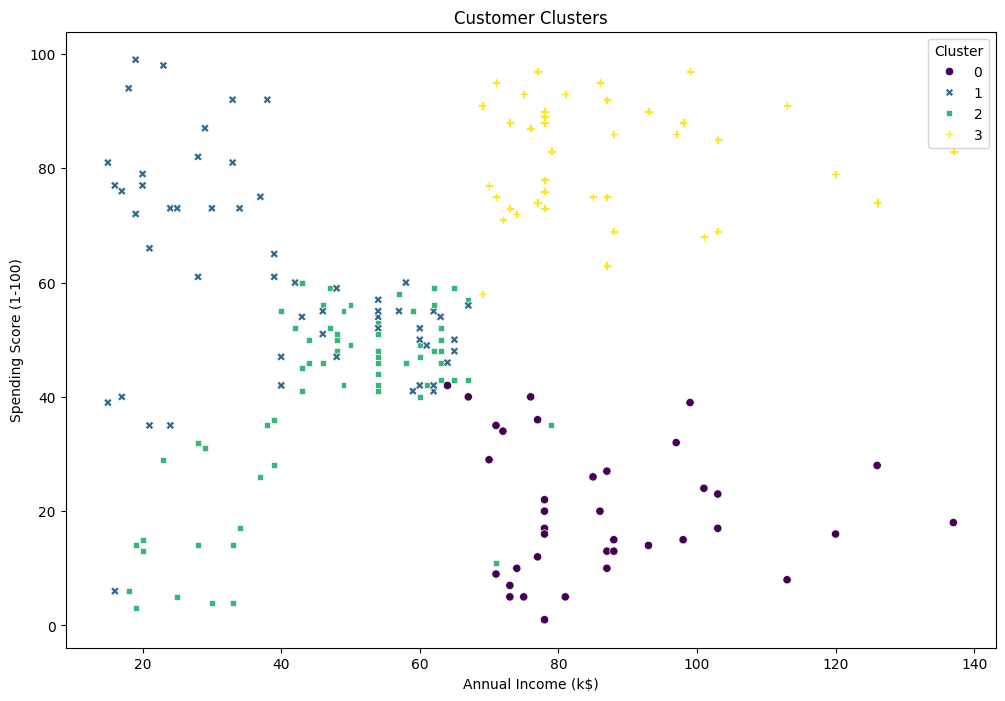

In [7]:
features= data [['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
k=4
kmeans = KMeans(n_clusters=k,random_state=0)
data['Cluster']=kmeans.fit_predict(scaled_features)
print("Cluster Centers (After inverse scaling):")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),columns=features.columns))
plt.figure(figsize=(12,8))
# Use 'Cluster' (capital C) to match the column name in your DataFrame
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',data=data,palette='viridis',style='Cluster')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()